In [1]:
from datetime import datetime

import pandas as pd
import matplotlib.pyplot as plt

from fetch_data import FVCParser, RegisterParser, Combo, flatten_by

%matplotlib inline

FVC_FPATH = 'data_files/FVC_2019_Q4.xlsx'
STS_FPATH = 'data_files/esma33-128-760_securitisations_designated_as_sts_as_from_01_01_2019_regulation_2402_2017.xlsx'
fvc_parser = FVCParser(FVC_FPATH)
sts_parser = RegisterParser(STS_FPATH, fvc_parser)

In [2]:
df = sts_parser.get_between(to_date=datetime(2019, 12, 31))
df_all = sts_parser.get_between(to_date=datetime(2020, 3, 31))
#df.set_index('Notification date to ESMA', inplace=True)
df_all

,Notification number,Unique Securitisation Identifier,Private or Public,Non-ABCP/ ABCP transaction/ ABCP Programme,Underlying assets,Securitisation Name,Originator Country,ISIN code,Administrative sanctions present (YES/NO),Last updated,STS notification template,Country of residence,LEI,Name,Address,Nature of securitisation,Management company country of residence,Management company LEI,Management company name
Notification date to ESMA,,,,,,,,,,,,,,,,,,,
2020-03-18,199,Private_2020_03_18_01,Private,ABCP transaction,auto loans / leases,NaN,NaN,NaN,NO,NaT,NaN,None,None,None,None,None,None,None,None
2020-03-18,198,815600848DEFE160E913N202001,Public,Non-ABCP,consumer loans,Marzio Finance Series 8-2020,IT,IT0005405334 / IT0005405326,NO,NaT,STS file,None,None,None,None,None,None,None,None
2020-03-18,197,549300QS0R6M20VUB380N202001,Public,Non-ABCP,residential mortgages,Burlington Mortgages No.1 DAC,IE,XS2131185873 / XS2131186848 / XS2131185105 / X...,NO,NaT,STS file,None,None,None,None,None,None,None,None
2020-03-18,196,Private_2020_03_18_01,Private,ABCP transaction,trade receivables,NaN,NaN,NaN,NO,NaT,NaN,None,None,None,None,None,None,None,None
2020-03-17,195,Private_2020_03_17_07,Private,ABCP transaction,others,NaN,NaN,NaN,NO,NaT,NaN,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-23,5,529900T9MJ6GH7X6QA19N201901,Public,Non-ABCP,auto loans / leases,RevoCar 2019,DE,XS1971583106 / XS1971583015 / XS1971582983 / X...,NO,NaT,STS file,DE,529900X8DN3KONBP9A60,RevoCar 2019 UG (haftungsbeschränkt),c/o Wilmington Trust SP Services (Frankfurt) G...,Traditional securitisation,DE,549300FQIATT55VHST47,Wilmington Trust SP Services (Frankfurt) GmbH
2019-04-18,4,549300F2EUS6QS7H4D81N201901,Public,Non-ABCP,residential mortgages,Cartesian Residential Mortgages Blue S.A,NL,XS1971361974,NO,NaT,STS file,LU,222100SW5Z8B4T9XQY52,Cartesian Residential Mortgages Blue S.A.,"6, rue Eugène Ruppert",NaN,NaN,NaN,NaN
2019-04-11,3,724500VZ11H30K1D6902N201901,Public,Non-ABCP,residential mortgages,STORM 2019-I,NL,XS1965521203,NO,NaT,STS file,NL,724500SPNG1Y780R6W06,STORM 2019-I B.V.,Postbus 990,Traditional securitisation,NL,NaN,INTERTRUST (NETHERLANDS) B.V.


In [3]:
df.tail()
#df.loc[df['Originator Country'] == 'ES']#['ISIN code'].iloc[0]

,Notification number,Unique Securitisation Identifier,Private or Public,Non-ABCP/ ABCP transaction/ ABCP Programme,Underlying assets,Securitisation Name,Originator Country,ISIN code,Administrative sanctions present (YES/NO),Last updated,STS notification template,Country of residence,LEI,Name,Address,Nature of securitisation,Management company country of residence,Management company LEI,Management company name
Notification date to ESMA,,,,,,,,,,,,,,,,,,,
2019-04-23,5,529900T9MJ6GH7X6QA19N201901,Public,Non-ABCP,auto loans / leases,RevoCar 2019,DE,XS1971583106 / XS1971583015 / XS1971582983 / X...,NO,NaT,STS file,DE,529900X8DN3KONBP9A60,RevoCar 2019 UG (haftungsbeschränkt),c/o Wilmington Trust SP Services (Frankfurt) G...,Traditional securitisation,DE,549300FQIATT55VHST47,Wilmington Trust SP Services (Frankfurt) GmbH
2019-04-18,4,549300F2EUS6QS7H4D81N201901,Public,Non-ABCP,residential mortgages,Cartesian Residential Mortgages Blue S.A,NL,XS1971361974,NO,NaT,STS file,LU,222100SW5Z8B4T9XQY52,Cartesian Residential Mortgages Blue S.A.,"6, rue Eugène Ruppert",NaN,NaN,NaN,NaN
2019-04-11,3,724500VZ11H30K1D6902N201901,Public,Non-ABCP,residential mortgages,STORM 2019-I,NL,XS1965521203,NO,NaT,STS file,NL,724500SPNG1Y780R6W06,STORM 2019-I B.V.,Postbus 990,Traditional securitisation,NL,NaN,INTERTRUST (NETHERLANDS) B.V.
2019-03-27,2,Private_2019_03_27_01,Private,ABCP transaction,trade receivables,NaN,NaN,NaN,NO,NaT,STS file,None,None,None,None,None,None,None,None
2019-03-22,1,Private_2019_03_22_01,Private,Non-ABCP,residential mortgages,NaN,NaN,NaN,NO,NaT,STS file,None,None,None,None,None,None,None,None


In [4]:
fvc_df = df.loc[pd.notnull(df['Country of residence'])]
fvc_df

,Notification number,Unique Securitisation Identifier,Private or Public,Non-ABCP/ ABCP transaction/ ABCP Programme,Underlying assets,Securitisation Name,Originator Country,ISIN code,Administrative sanctions present (YES/NO),Last updated,STS notification template,Country of residence,LEI,Name,Address,Nature of securitisation,Management company country of residence,Management company LEI,Management company name
Notification date to ESMA,,,,,,,,,,,,,,,,,,,
2019-12-23,137,724500VZ11H30K1D6902N201805,Public,Non-ABCP transaction,residential mortgages,STRONG 2018,NL,XS1917948009,NO,NaT,STS file,NL,7245006HSRRX95HP6R48,STRONG 2018 B.V.,Postbus 990,Traditional securitisation,NL,NaN,INTERTRUST (NETHERLANDS) B.V.
2019-12-23,136,724500VZ11H30K1D6902N201804,Public,Non-ABCP transaction,residential mortgages,STORM 2018-II,NL,XS1865824111,NO,NaT,STS file,NL,724500EOV5RIG1RT6L32,Storm 2018-II B.V.,Postbus 990,Traditional securitisation,NL,NaN,INTERTRUST (NETHERLANDS) B.V.
2019-12-19,127,724500SS7BUJWFBMAQ94N201901,Public,Non-ABCP,consumer loans,Magoi B.V.,NL,XS1907540147,NO,NaT,STS file,NL,724500SS7BUJWFBMAQ94,Magoi B.V.,NaN,NaN,NL,NaN,INTERTRUST (NETHERLANDS) B.V.
2019-12-05,116,5299002CRNX7K6KOL397N201901,Public,Non-ABCP,auto loans / leases,SC Germany Auto 2019-1,DE,XS2066921466 / XS2066952776,NO,NaT,STS file,DE,NaN,SC Germany Auto 2019-1 UG (haftungsbeschränkt),c/o Wilmington Trust SP Services (Frankfurt) G...,Traditional securitisation,DE,549300FQIATT55VHST47,Wilmington Trust SP Services (Frankfurt) GmbH
2019-11-25,100,549300V1VN70Q7PQ7234N201901,Public,Non-ABCP,auto loans / leases,Asset-Backed European Securitisation Transacti...,IT,IT0005388795 / IT0005388779 / IT0005388746 / I...,NO,NaT,STS file,IT,8156005902A8E5CAF286,ASSET-BACKED EUROPEAN SECURITISATION TRANSACTI...,VIA V. ALFIERI 1,Traditional securitisation,NaN,NaN,NaN
2019-11-25,98,5299004GLEUX88BSNB74N201904,Public,Non-ABCP,auto loans / leases,VCL 29,DE,XS2057959954 / XS2057983152,NO,NaT,STS file,LU,5299008QAF8H66VI9L59,VCL Multi-Compartment S.A.,"22-24, boulevard Royal",NaN,NaN,NaN,NaN
2019-11-22,96,5299009502R8B6S3LN39N201901,Public,Non-ABCP,leases,"abc SME Lease Germany SA , acting in respect o...",DE,XS2050524458 / XS2050535736 / XS2050536627,NO,NaT,STS file,LU,549300OFZLZPYBUBLU38,abc SME Lease Germany SA,"22-24, boulevard Royal",NaN,NaN,NaN,NaN
2019-11-21,95,529900LZT3QKPD355Q25N201901,Public,Non-ABCP,auto loans / leases,Red & Black Auto Germany 6,DE,XS2057073442 / XS2057073368 / XS2057073871 / X...,NO,NaT,STS file,DE,529900CWO3SWMAZHGU20,Red & Black Auto Germany 6 UG [haftungsbeschrä...,Steinweg 3-5 c/o Wilmington Trust SP Ser,Traditional securitisation,DE,549300FQIATT55VHST47,Wilmington Trust SP Services (Frankfurt) GmbH
2019-11-19,93,549300BDK2FS7ZK39197N201901,Public,Non-ABCP,consumer loans,Quarzo S.r.l. - Series 2019,IT,IT0005389272 / IT0005389264 / IT0005389280,NO,NaT,STS file,IT,815600702F68B2ED0B22,QUARZO S.R.L.,GALLERIA DEL CORSO 2,Traditional securitisation,IT,549300BDK2FS7ZK39197,COMPASS BANCA SPA


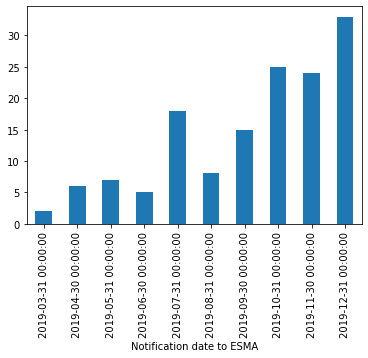

In [5]:
df.resample('M').count()['Unique Securitisation Identifier'].plot.bar()

In [6]:
len(fvc_df)

48

In [7]:
list(df.groupby('Private or Public').count().index)

['Private', 'Public']

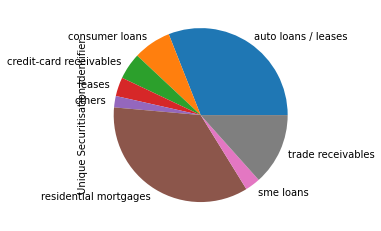

In [8]:
df.groupby('Underlying assets').count()['Unique Securitisation Identifier'].plot.pie()

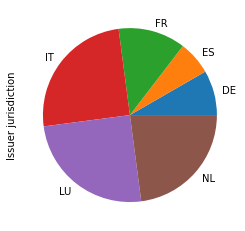

In [9]:
fvc_df.groupby('Country of residence').count()['Unique Securitisation Identifier'].plot.pie(label='Issuer jurisdiction')

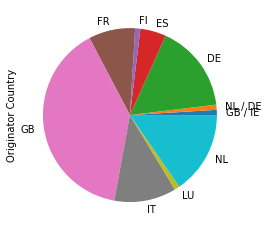

In [10]:
df.groupby('Originator Country').count()['Unique Securitisation Identifier'].plot.pie(label='Originator Country')

In [11]:
oct2019 = sts_parser.get_between(datetime(2019, 10, 1), datetime(2019, 10, 31))
oct2019 = oct2019.loc[oct2019['Private or Public'] == 'Public'].dropna(subset=['Country of residence'])
#test_df = oct2019_pub[['Originator Country', 'Country of residence']].dropna()
#oct2019_pub.groupby('Originator Country').count()['Unique Securitisation Identifier'].plot.pie()
oct2019

,Notification number,Unique Securitisation Identifier,Private or Public,Non-ABCP/ ABCP transaction/ ABCP Programme,Underlying assets,Securitisation Name,Originator Country,ISIN code,Administrative sanctions present (YES/NO),Last updated,STS notification template,Country of residence,LEI,Name,Address,Nature of securitisation,Management company country of residence,Management company LEI,Management company name
Notification date to ESMA,,,,,,,,,,,,,,,,,,,
2019-10-31,86,54930032M1SQPJNRZ420N201901,Public,Non-ABCP,residential mortgages,BPCE Home Loans FCT 2019,FR,FR0013449394,NO,NaT,STS list,FR,54930032M1SQPJNRZ420,BPCE HOME LOANS FCT 2019,3-5-7 RUE du General COMPANS ACI: CKA03C1,Traditional securitisation,FR,NaN,FRANCE TITRISATION
2019-10-25,85,815600F37471C4E69D64N201902,Public,Non-ABCP,consumer loans,Sunrise SPV Z80 S.r.l. Securitisation,IT,IT0005388514 / IT0005388506 / IT0005388480 / I...,NO,NaT,STS file,IT,81560094896A760E4634,SUNRISE SPV Z80 S.R.L.,VIA VITTORIO BETTELONI 2,Traditional securitisation,NaN,NaN,NaN
2019-10-25,84,529900RKV8QCFPSFUR46N201301,Public,Non-ABCP,auto loans / leases,Driver UK Master Compartment 2,GB,XS0994381183 / XS1821972624 / XS1821973432 / X...,NO,NaT,STS file,LU,529900MRO80NKJYUH055,Driver UK Master S.A.,"22-24, boulevard Royal",NaN,NaN,NaN,NaN
2019-10-23,81,529900T9MJ6GH7X6QA19N201902,Public,Non-ABCP,auto loans / leases,RevoCar 2019-2,DE,XS2053516980 / XS2053517012 / XS2053517368 / X...,NO,NaT,STS file,DE,529900IG0UODRS059S56,RevoCar 2019-2 UG (haftungsbeschränkt),c/o Wilmington Trust SP Services (Frankfurt) G...,Traditional securitisation,DE,549300FQIATT55VHST47,Wilmington Trust SP Services (Frankfurt) GmbH
2019-10-22,80,549300BZZFFS0SOWR325N201901,Public,Non-ABCP,auto loans / leases,Globaldrive Auto Receivables 2019-A B.V.,NL / DE,XS2044475601 / XS2044474547,NO,NaT,STS file,NL,724500J04T7SUPUTN804,Globaldrive Auto Receivables 2019-A B.V.,Strawinskylaan 3127 8e,Traditional securitisation,NL,529900PXR0J9GK6CHS44,Vistra Capital Markets (Netherlands) N.V.
2019-10-21,79,969500STN7T9MRUMJ267N201901,Public,Non-ABCP,sme loans,FCT Bpifrance SME 2019-1,FR,FR0013452117 / FR0013454212,NO,NaT,STS file,FR,9695004QAF3VC8YD0759,FCT BPIFRANCE SME 2019-1,12 rue James Watt Immeuble « Le Spallis »Batim...,Traditional securitisation,FR,NaN,EUROTITRISATION
2019-10-18,78,549300B0FLNFTFYQDJ30N201901,Public,Non-ABCP,sme loans,Civitas SPV S.r.l. - Series 2019-1,IT,IT0005388324 / IT0005388332 / IT0005388316,NO,NaT,STS list,IT,8156004EE46307A55691,CIVITAS SPV S.R.L.,VIA V.ALFIERI 1,Traditional securitisation,IT,549300B0FLNFTFYQDJ30,BANCA DI CIVIDALE SOCIETA' COOPERATIVA PER AZI...
2019-10-14,69,549300K0MCEQLLRYS435N201901,Public,Non-ABCP,auto loans / leases,"SANTANDER CONSUMER SPAIN AUTO 2019-1, FONDO DE...",ES,ES0305442040 / ES0305442008 / ES0305442016 / E...,NO,NaT,STS file,ES,894500LAH3RZUM66PE80,SANTANDER CONSUMER SPAIN AUTO 2019-1 FONDO DE ...,JUAN IGNACIO LUCA DE TENA 9-11,Traditional securitisation,ES,NaN,"SANTANDER DE TITULIZACION, SGFT, S.A."
2019-10-11,68,549300S7DH0HXAJSVI23N201801,Public,Non-ABCP,residential mortgages,SAECURE 16,NL,XS1900198539,NO,NaT,STS file,NL,724500FNKNFUQR1X6603,Saecure 16 B.V.,Postbus 990,Traditional securitisation,NL,NaN,INTERTRUST (NETHERLANDS) B.V.


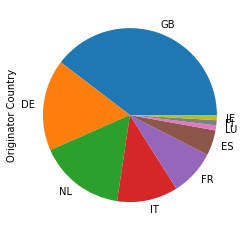

In [12]:
flatten_by(df, 'Originator Country')['Originator Country'].value_counts().plot.pie()

In [27]:
#flatten_by(df, 'Originator Country').groupby('Originator Country').resample('M').count().drop('Originator Country', axis=1).swaplevel(0, 1)#.groupby(['Notification date to ESMA', 'Originator Country']).count()
df2 = flatten_by(df, 'Originator Country').groupby(['Originator Country']).resample('M').count()['Notification number']
#df2.unstack()#.plot.bar(stacked=True)
#df2.index = df2.index.sort_values()
df2
#df2.index.get_level_values(0)
#df2.index.get_level_values(0).plot
#df2.index.names

Originator Country  Notification date to ESMA
DE                  2019-04-30                    2
                    2019-05-31                    0
                    2019-06-30                    1
                    2019-07-31                    2
                    2019-08-31                    0
                    2019-09-30                    3
                    2019-10-31                    4
                    2019-11-30                    3
                    2019-12-31                    3
ES                  2019-07-31                    1
                    2019-08-31                    0
                    2019-09-30                    1
                    2019-10-31                    2
                    2019-11-30                    0
                    2019-12-31                    1
FI                  2019-10-31                    1
FR                  2019-05-31                    2
                    2019-06-30                    0
                  

In [14]:
df.groupby('Notification date to ESMA').count().cumsum()['Notification number']


Notification date to ESMA
2019-03-22      1
2019-03-27      2
2019-04-11      3
2019-04-18      4
2019-04-23      5
             ... 
2019-12-19    129
2019-12-20    134
2019-12-23    140
2019-12-27    141
2019-12-31    143
Name: Notification number, Length: 83, dtype: int64

In [15]:
uo = flatten_by(df_all, 'Originator Country').groupby(['Originator Country', 'Underlying assets']).count()['Unique Securitisation Identifier']
for i in uo.index.levels[1]:
    print(i)

auto loans / leases
consumer loans
credit-card receivables
leases
others
residential mortgages
sme loans
trade receivables


In [16]:
uo.index.levels

FrozenList([['DE', 'ES', 'FI', 'FR', 'GB', 'IE', 'IT', 'LU', 'NL'], ['auto loans / leases', 'consumer loans', 'credit-card receivables', 'leases', 'others', 'residential mortgages', 'sme loans', 'trade receivables']])

In [17]:
df.loc[df['Private or Public'] == 'Public']


,Notification number,Unique Securitisation Identifier,Private or Public,Non-ABCP/ ABCP transaction/ ABCP Programme,Underlying assets,Securitisation Name,Originator Country,ISIN code,Administrative sanctions present (YES/NO),Last updated,STS notification template,Country of residence,LEI,Name,Address,Nature of securitisation,Management company country of residence,Management company LEI,Management company name
Notification date to ESMA,,,,,,,,,,,,,,,,,,,
2019-12-23,137,724500VZ11H30K1D6902N201805,Public,Non-ABCP transaction,residential mortgages,STRONG 2018,NL,XS1917948009,NO,NaT,STS file,NL,7245006HSRRX95HP6R48,STRONG 2018 B.V.,Postbus 990,Traditional securitisation,NL,NaN,INTERTRUST (NETHERLANDS) B.V.
2019-12-23,136,724500VZ11H30K1D6902N201804,Public,Non-ABCP transaction,residential mortgages,STORM 2018-II,NL,XS1865824111,NO,NaT,STS file,NL,724500EOV5RIG1RT6L32,Storm 2018-II B.V.,Postbus 990,Traditional securitisation,NL,NaN,INTERTRUST (NETHERLANDS) B.V.
2019-12-19,127,724500SS7BUJWFBMAQ94N201901,Public,Non-ABCP,consumer loans,Magoi B.V.,NL,XS1907540147,NO,NaT,STS file,NL,724500SS7BUJWFBMAQ94,Magoi B.V.,NaN,NaN,NL,NaN,INTERTRUST (NETHERLANDS) B.V.
2019-12-18,123,D2OIGPB6E66YOBJ9GT20N201902,Public,Non-ABCP,auto loans / leases,Bavarian Sky Compartment German Auto Loans 9,DE,XS2074662805 / XS2074667192,NO,NaT,STS file,None,None,None,None,None,None,None,None
2019-12-17,121,8IBZUGJ7JPLH368JE346N201901,Public,Non-ABCP,residential mortgages,EDML 2019-1,DE,XS2076796403 / XS2076796742 / XS2076796312 / X...,NO,NaT,STS file,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-25,7,5299004GLEUX88BSNB74N201901,Public,Non-ABCP,auto loans / leases,VCL 28,DE,XS1956112970 / XS1956112038,NO,NaT,STS file,LU,5299008QAF8H66VI9L59,VCL Multi-Compartment S.A.,"22-24, boulevard Royal",NaN,NaN,NaN,NaN
2019-04-24,6,"549300XFX12G42QIKN82N200838, 549300XFX12G42QIK...",Public,Non-ABCP,residential mortgages,Silverstone Master Issuer plc Series 2019-1 Notes,GB,US82846GAV23 / XS1966676360 / XS1966679893 / X...,NO,NaT,STS file,None,None,None,None,None,None,None,None
2019-04-23,5,529900T9MJ6GH7X6QA19N201901,Public,Non-ABCP,auto loans / leases,RevoCar 2019,DE,XS1971583106 / XS1971583015 / XS1971582983 / X...,NO,NaT,STS file,DE,529900X8DN3KONBP9A60,RevoCar 2019 UG (haftungsbeschränkt),c/o Wilmington Trust SP Services (Frankfurt) G...,Traditional securitisation,DE,549300FQIATT55VHST47,Wilmington Trust SP Services (Frankfurt) GmbH


In [18]:
#df[df['Securitisation Name'].str.strip() == 'Marketplace Originated Consumer Assets 2019-1 PLC']
df_all[df_all['Securitisation Name'].str.strip() == 'Marketplace Originated Consumer Assets 2019-1 PLC']

,Notification number,Unique Securitisation Identifier,Private or Public,Non-ABCP/ ABCP transaction/ ABCP Programme,Underlying assets,Securitisation Name,Originator Country,ISIN code,Administrative sanctions present (YES/NO),Last updated,STS notification template,Country of residence,LEI,Name,Address,Nature of securitisation,Management company country of residence,Management company LEI,Management company name
Notification date to ESMA,,,,,,,,,,,,,,,,,,,
2020-02-11,166,213800T5XS8XOE1XCJ21N201901,Public,Non-ABCP,consumer loans,Marketplace Originated Consumer Assets 2019-1...,GB / LU,XS2083974274 / XS2083973466 / XS2083975164 / X...,NO,NaT,STS file,None,None,None,None,None,None,None,None


In [33]:
set(df['Originator Country'].dropna())

{'DE', 'ES', 'FI', 'FR', 'GB', GB / IE, 'IT', 'LU', 'NL', NL / DE}